# Introduction



Customer churn can be a major threat to businesses that need to sustain development and competitiveness. Financial services. Often in financial services, the customer relationships are long-term and high-value, so it is key to understand the reasons why customers leave. This project would use the customer data to draw useful patterns and trends that drive the churn behavior with a view to assisting in making wiser churn strategies in SmartBank, a subsidiary of Lloyds Banking Group.


# Problem Statement

SmartBank has lost customer retention, which is especially evident among younger professionals and small business bank clients. Such a tendency may indicate that there are cracks in customer satisfaction or fitment with the service. To eliminate the problem, it is important to study the customer data and find out the main factors that lead to churn. The result will inform the creation of a predictive model to lead to timely and focused interventions.


# Objectives
In order to help build a predictive model of customer churn, this project will:

To find and choose pertinent customer data, including account activity, and service use, which could determine churn behaviour.

To conduct exploratory data analysis (EDA) in order to discover meaningful patterns, trends, and correlations that explain customer attrition.

To prepare and preprocess the data, including missing values, outlier treatment, encoding categorical variables, construction, and scales of numerical features, ensures that the dataset is ready to build models

# Data collection
The dataset considered in this analysis was retrieved on Kaggle, a trusted enterprise of open-source datasets and data science competitions. It is a simulation of customer data of a financial institution, and it is used largely for churn prediction assignments.

A single record represents the customer, and the variables are both demographic and behavioral ones; the values are captured. Finally, there is a binary labeled churn (Exited) to signify whether the customer left the service or not.

Major categories of features:
Demographic Information
Has Gender, Age, and Geography that make it easier to put the customer background in perspective and give a basis to categorize customer behavior.

Details of Account and Services
They include Tenure as well as NumOfProducts with HasCrCard and IsActiveMember, which establishes that the presence of a customer is related to the service timeline.

Financial Data
Incorporates CreditScore, Balance, and EstimatedSalary that indicate the financial status of the customer and his/her potential.

Target Variable

Exited: A binary variable with one being the churned and zero remaining retained.

The data set presents a reliable basis for determining reasons that lead to customer churn and can be used in coming up with predictive models to help enhance retention strategies.





# Stakeholders
The individuals and groups of people affected either directly or indirectly by the effects of this customer churn analysis are as follows:

Executive Team-SmartBank
This group will take care of strategy formulation decisions and will employ insights on churn to come up with customer retention policies and resource deployment in terms of intervention strategies.

Data Science & Analytics Unit
As a senior data scientist, Li leads this team to monitor the modeling process and will use the ready data set and the results to create and implement the predictive churn model.

Teams: Marketing, Customer Retention
Such teams will be dependent on the output of the model to create and execute specific campaigns focused on the vulnerable categories of customers.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [8]:
#Reading of the csv data
bank = pd.read_csv("Customer-Churn-Records.csv")
bank.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [9]:
# checking for any missing value in our dataset 
bank.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [10]:
# checking fos any duplicates in out data 
bank.duplicated().sum()

0

Our data has no any missing value nor any duplicated value

In [12]:
# checking for our data information
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [13]:
#statistical approach 
bank.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

The data built upon this gives information about customer demographics, behaviour, and the probability of customer churn from a bank. It consists of 10,000 records that have characteristics of age, credit score, tenure, account balance, number of products used, and whether the customer is a credit card holder or an active member. The customers who have churned are about 20.4 percent, a satisfactory percentage for the churn analysis. The mean age of customers is approximately 39 years, whereby most customers have 1 to 2 products utilized in banks. Interestingly, there is a large volume of customers with zero balance, which could mean inactive accounts. The satisfaction rates scored 1 to 5, with an average of 3, whereas there are varying point earners, indicating a different level of engagement. Such characteristics as complaints and satisfaction could be important factors in determining churn. 

# Data Analysis

# Univariate Analysis

# What is the distribution of customer ages?

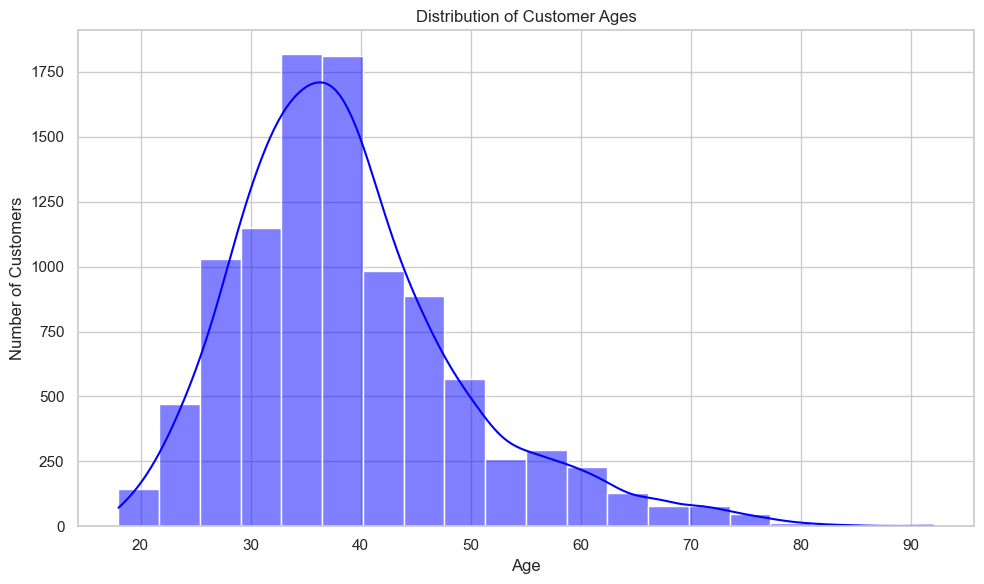

In [18]:
# Set plot style
sns.set(style="whitegrid")
# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(bank['Age'], bins=20, kde=True, color='blue')
plt.title("Distribution of Customer Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

The age distribution of the customers is skewed to the right, and the majority fall between the ages of 25 and 40. The lowest age identified is 18 years, and the highest is 92 years, portraying a wide range of customer demographics. The average number is nearly 39 years, and the histogram reveals a cluster at 30- 35 years of age. This imbalanced allocation means that the bank mainly attracts the young or middle-aged clients, compared to old clients. 

# What is the average credit score across all customers?

In [21]:
# finding the evarage credit score in our dataset
average_credit_score = bank['CreditScore'].mean()
print("Average Credit Score:", average_credit_score)


Average Credit Score: 650.5288


# How many customers have churned vs. stayed?

In [23]:
# Count of churned (Exited = 1) vs. stayed (Exited = 0)
churn_counts = bank['Exited'].value_counts()
print(churn_counts)


Exited
0    7962
1    2038
Name: count, dtype: int64


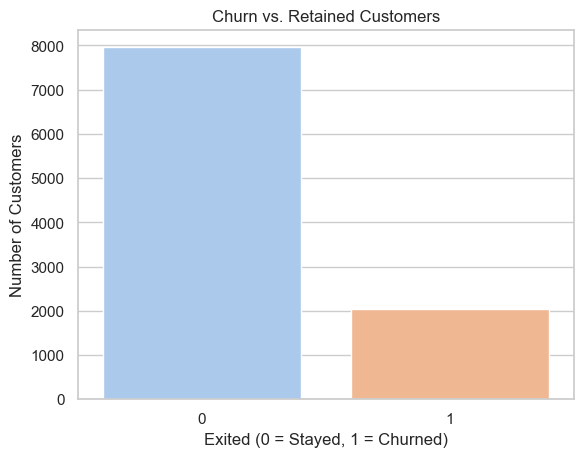

In [24]:
sns.countplot(x='Exited', data=bank, palette='pastel')
plt.title('Churn vs. Retained Customers')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Number of Customers')
plt.show()


Out of the data, 2,038 customers have already churned ( Exited = 1) and 7,962 have remained ( Exited = 0). This implies that **20.4** percent of the customers have exited the bank and 79.6 percent have not. The behavior of this churn rate is a good place to start in modeling and the study of customer retention.



# What is the distribution of satisfaction scores?

In [27]:
# Count of churned (Exited = 1) vs. stayed (Exited = 0)
churn_counts = bank['Satisfaction Score'].value_counts()
print(churn_counts)

Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64


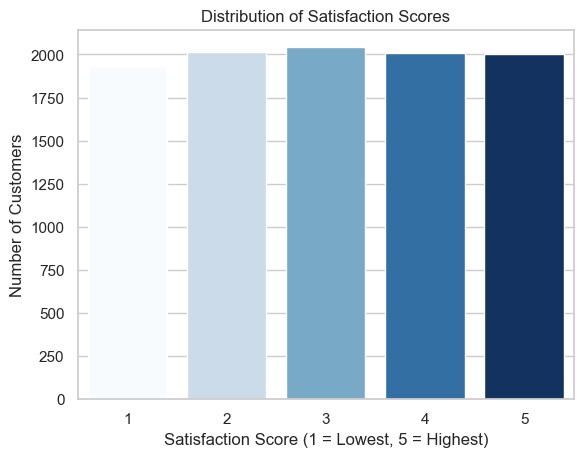

In [28]:
# Plot the distribution 
sns.countplot(x='Satisfaction Score', data=bank, hue='Satisfaction Score', palette='Blues', legend=False)
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score (1 = Lowest, 5 = Highest)')
plt.ylabel('Number of Customers')
plt.show()


The data plot of the satisfaction levels are more or less distributed equally across all levels, and ther, and the middle score risest prevalent satisfaction rate is **3** and **2,042** customers occupy it, next comes the rates **2 (2,014), 4 (2,008), and 5 (2,004)**, the latter three rates are very close to each other. Customers' rankings were lowest at **1** with **1,932** giving the lowest ranking. This implies an approximate even spread of satisfaction around the median (the neutral point 3), and no extreme skew left or right regarding satisfaction or dissatisfaction. Most customers assigned satisfaction on a scale between 2 and 4, indicating a combination of experiences within the bank.

# How many customers use each number of bank products?

In [31]:
# Count the number of customers per number of products
product_counts = bank['NumOfProducts'].value_counts().sort_index()
print(product_counts)


NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


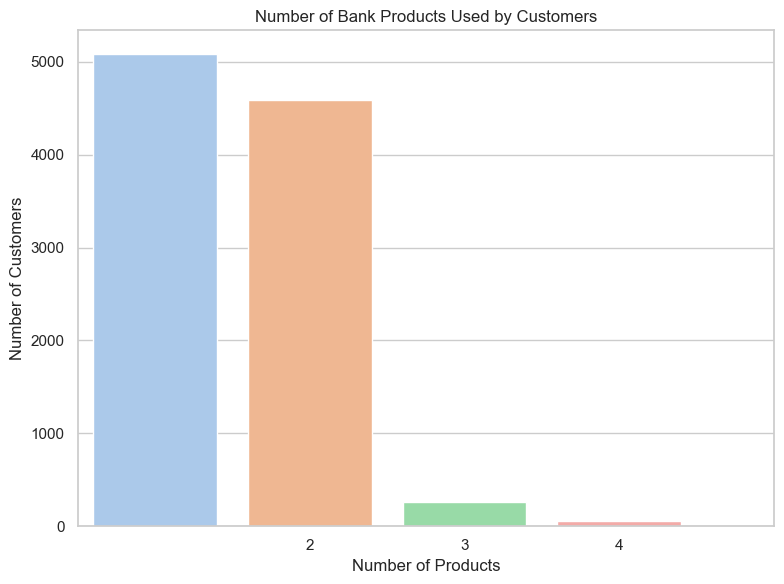

In [32]:
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=product_counts.index, y=product_counts.values, palette='pastel')

plt.title('Number of Bank Products Used by Customers')
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.xticks(product_counts.index)
plt.tight_layout()
plt.show()


A majority of the customers subscribe to a single or two bank products. In particular, 5,084 customers take 1 product, whereas 4,590 take 2 products. Fewer than 0.1 percent of them buy more: 266 users use 3 products and 60 users use 4 products. This indicates that the majority of customers are utilizing less of the products and there are options that the bank can use to motivate them to use more.


# What percentage of customers have credit cards?

In [49]:
percentage_with_credit_card = (bank['HasCrCard'].sum() / len(bank)) * 100
print(f"{percentage_with_credit_card:.2f}% of customers have credit cards.")


70.55% of customers have credit cards.


70.55% of customers have credit cards.


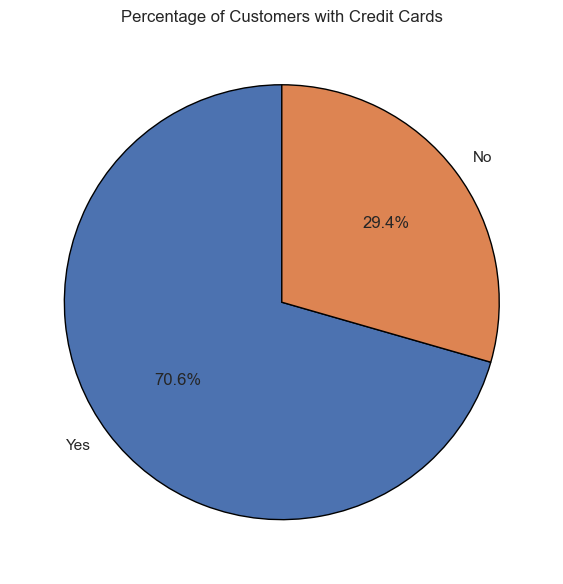

In [51]:
percentage_with_credit_card = (bank['HasCrCard'].sum() / len(bank)) * 100
print(f"{percentage_with_credit_card:.2f}% of customers have credit cards.")

labels = ['Yes', 'No']
sizes = [7055, 2945]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage of Customers with Credit Cards')
plt.tight_layout()
plt.show()


# What is the distribution of loyalty points earned?

In [54]:
bank['Point Earned'].describe()


count    10000.000000
mean       606.515100
std        225.924839
min        119.000000
25%        410.000000
50%        605.000000
75%        801.000000
max       1000.000000
Name: Point Earned, dtype: float64

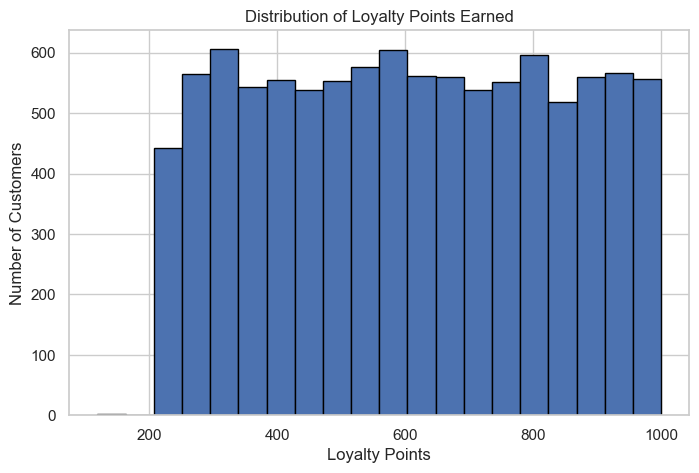

In [55]:
# Plot histogram of Point Earned
plt.figure(figsize=(8, 5))
plt.hist(bank['Point Earned'], bins=20, edgecolor='black')
plt.title('Distribution of Loyalty Points Earned')
plt.xlabel('Loyalty Points')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


The distribution of the loyalty points to the customers, with the majority earning between 200 and 900 points. The mean of the points is nearly 606, and the minimum and maximum are 119 and 1000 points, respectively. There are no extremes, such as customers' consistency in the points earned. Many customers are close to 410 (25th percentile), 605 (median), and 801 (75th percentile). This indicates that the customers are relatively active within the loyalty program. Their loyalty points come in handy when forecasting churn among customers, given that the fewer the points, the lower the engagement will be there.

# What is the range and average of customer account balances?

In [59]:
# Range
balance_min = bank['Balance'].min()
balance_max = bank['Balance'].max()
balance_range = balance_max - balance_min

# Average
balance_mean = bank['Balance'].mean()

print(f"Range: {balance_min} to {balance_max} (Range = {balance_range})")
print(f"Average: {balance_mean}")


Range: 0.0 to 250898.09 (Range = 250898.09)
Average: 76485.889288


The minimum and maximum customer account balances are $0.00 and   about   $250,898.09, respectively, implying that the amount of money the customers deposit in their accounts varies significantly. The average balance is close to $76016.85, implying that many customers do not keep a low balance. The zero balance may represent idle accounts or clients who draw their money regularly.


# What proportion of customers have made complaints?

In [63]:
bank['Complain'].value_counts()


Complain
0    7956
1    2044
Name: count, dtype: int64

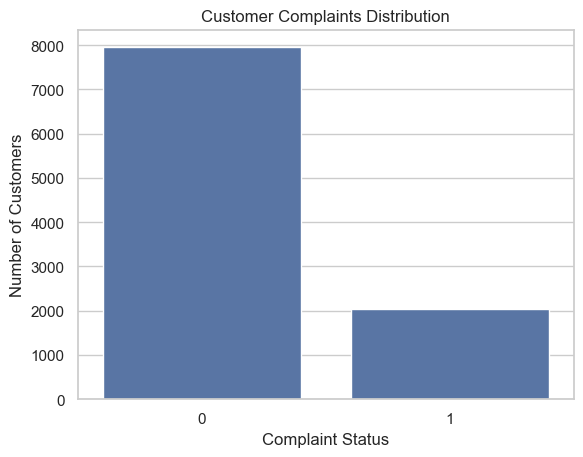

In [64]:


sns.countplot(x='Complain', data=bank)
plt.title('Customer Complaints Distribution')
plt.xlabel('Complaint Status')
plt.ylabel('Number of Customers')
plt.show()


Among a total customer base of 10,000, 2,044 customers, which is 20.44 percent, had raised complaints, and the rest, 7,956 customers, 79.56 percent, had not registered any complaint. This distribution indicates that most customers did not express concerns, indicating general customer satisfaction. However, the magnitude of more than 2,000 complaints would indicate that there are aspects where one needs to probe more to enhance customer satisfaction and service delivery.

# What is the tenure distribution of customers?

Tenure column description:
count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

Tenure distribution:
Tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: count, dtype: int64


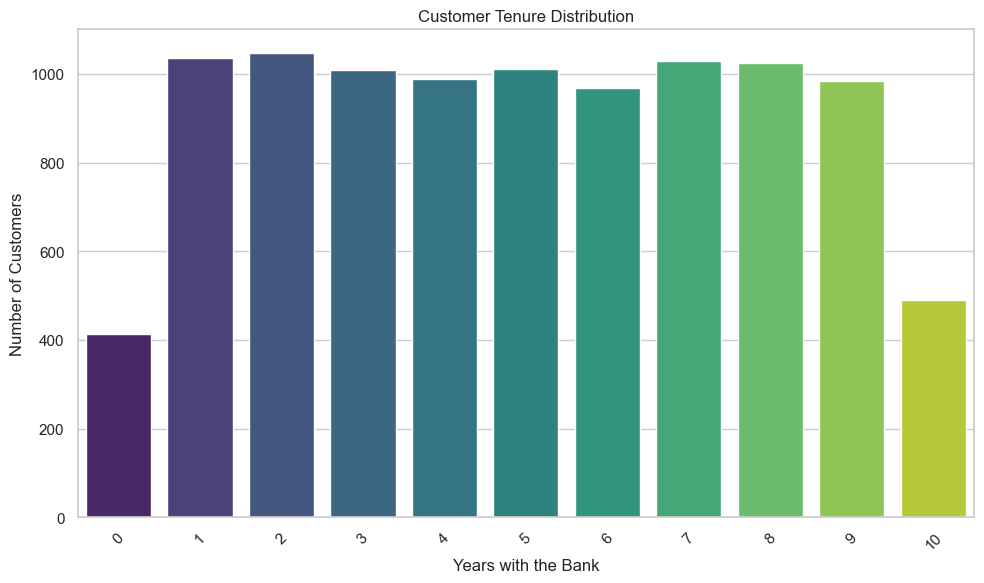

In [69]:
# Display basic info
print("Tenure column description:")
print(bank['Tenure'].describe())

# Count of customers per tenure year
tenure_counts = bank['Tenure'].value_counts().sort_index()
print("\nTenure distribution:")
print(tenure_counts)

# Plotting the tenure distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, x='Tenure', palette='viridis')
plt.title('Customer Tenure Distribution')
plt.xlabel('Years with the Bank')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There is a maximum tenure of 10 years, and a mean tenure of about 5 years, with a possible standard deviation of 2.89 in the distribution of tenure of the customers in a dataset. The figures indicate a relatively wide dispersion of the data through the tenure values of 1 to 9 years, with approximately 950 and 1050 customers. It is also interesting to note that the fewest number of customers is in the 0-year (413 customers) and 10-year (490 customers) tenure groups, which seems to denote the presence of most customers at the level of being newly onboarded or getting close to a decade of service; however, the massive majority are of mid-tenure. This allocation implies that customer retention remains relatively steady in the older years of tenure, but we will see a slight decline at the edges.


In [71]:
bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

# Bivariate Analysis

# What is the relationship between age and churn?

         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7962.0  37.408063  10.125957  18.0  31.0  36.0  41.0  92.0
1       2038.0  44.835623   9.759754  18.0  38.0  45.0  51.0  84.0


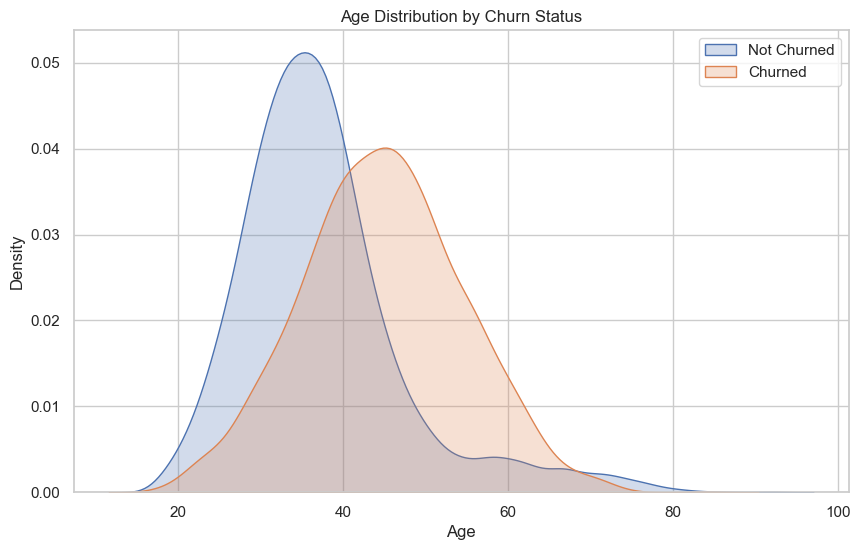

In [75]:
# Summary statistics
print(bank.groupby('Exited')['Age'].describe())

# KDE plot for better visualization
plt.figure(figsize=(10, 6))
sns.kdeplot(data=bank[bank['Exited'] == 0], x='Age', label='Not Churned', shade=True)
sns.kdeplot(data=bank[bank['Exited'] == 1], x='Age', label='Churned', shade=True)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Analysis indicates a close tie between customer age and churn behavior. The churned customers were also distinctly older (44.8 years) by comparison with stayers (37.4 years), yielding a difference of 7.4 years. KDE plots suggest churned customers are more focused on the 40-60 age interval, whereas non-churned customers are relatively younger (25-45). This implies that age can be a significant characteristic when considering churn, and as the customer ages, the customer is likely to churn. Such findings can help the bank work out age-related retention programs and offer more services to the middle-aged population.

# Does higher credit score reduce the likelihood of churn?

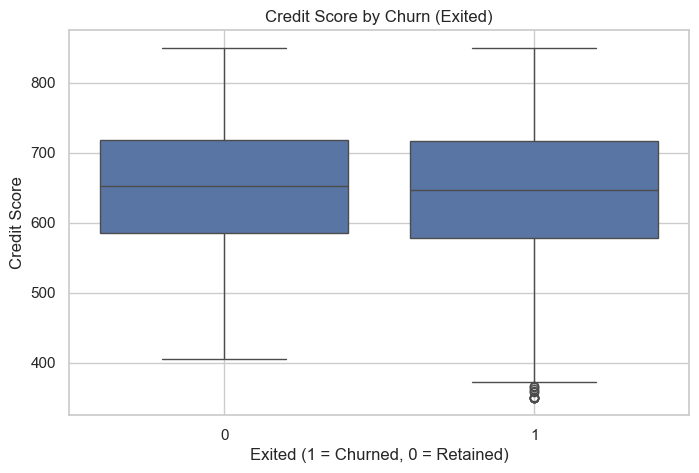

In [78]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='CreditScore', data=bank)
plt.title('Credit Score by Churn (Exited)')
plt.xlabel('Exited (1 = Churned, 0 = Retained)')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

The boxplot of the credit scores of customers who were churned and retained shows a slight change in the two sets of customers. The median credit score and distribution range are almost identical for churned and non-churned customers. It could imply that credit score is not a potent indicator of churn in this data. This observation implies that financial creditworthiness might not be a significant parameter that could trigger a customer to quit the bank. Instead, churn seems more of a matter of behavior or regarding service, e.g., age, satisfaction, or engagement as a loyal customer. Consequently, the retention strategies should not be credit-oriented but customer experience-oriented.

# Is there a difference in churn rate between active and inactive members?



In [83]:
# Group by activity status and calculate churn rate
churn_by_activity = bank.groupby('IsActiveMember')['Exited'].mean().reset_index()
churn_by_activity.columns = ['IsActiveMember', 'ChurnRate']
print(churn_by_activity)

   IsActiveMember  ChurnRate
0               0   0.268715
1               1   0.142691


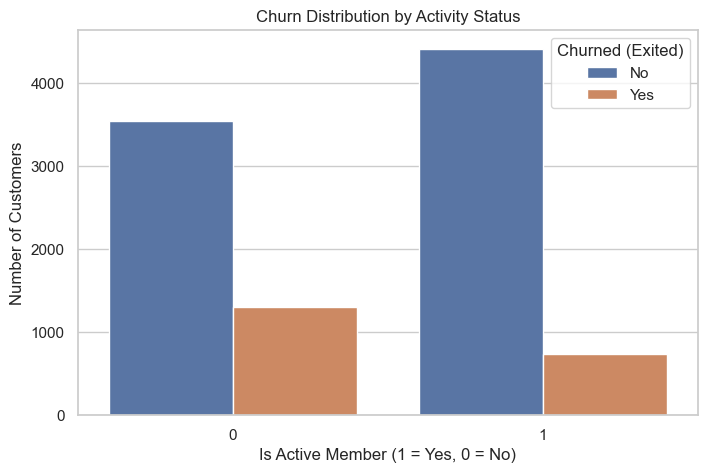

In [84]:
# Countplot to compare churn across activity status
plt.figure(figsize=(8, 5))
sns.countplot(x='IsActiveMember', hue='Exited', data=bank)
plt.title('Churn Distribution by Activity Status')
plt.xlabel('Is Active Member (1 = Yes, 0 = No)')
plt.ylabel('Number of Customers')
plt.legend(title='Churned (Exited)', labels=['No', 'Yes'])
plt.show()

Our analysis shows that a significant gap exists between the churn rate of active and inactive customers. The churn rate of inactive members is also very high, as it is almost twofold the churn rate in active members, with inactive members churning at 26.87, whereas active ones churn at 14.27 only. This reveals that the activity level is an important predictor of churn behavior. This trend is strengthened by the visual plot, which allows us to see clearly and openly that the inactive customers are much more prone to turning their backs on the bank. According to this insight, customer engagement should not be overlooked: customers who do not show activity are considered dangerous, and they should be given priority in receiving business-specific re-engagement interventions. Incorporation of this aspect in the churn prediction model will probably increase its accuracy and deliver some business actionable insights

# How does the number of products relate to customer churn?

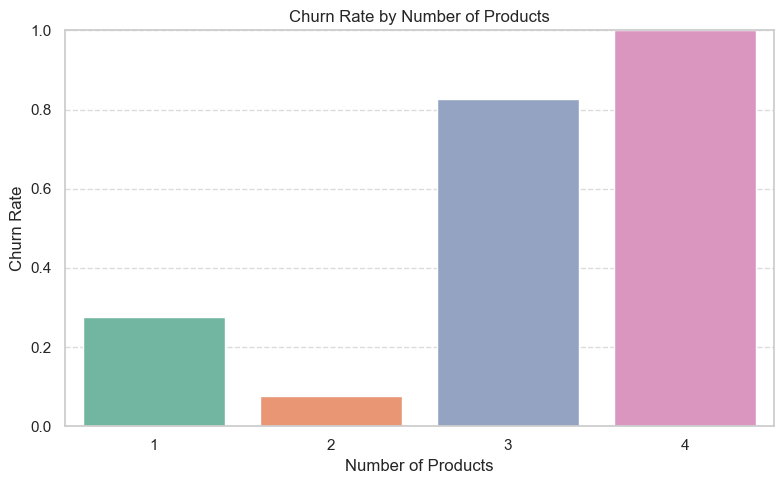

In [88]:
# Calculate churn rate by number of products
product_churn = bank.groupby('NumOfProducts')['Exited'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=product_churn, x='NumOfProducts', y='Exited', palette='Set2')

plt.title('Churn Rate by Number of Products')
plt.ylabel('Churn Rate')
plt.xlabel('Number of Products')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The analysis between the quantity of products that a customer owns and the probability of churning points out an interesting U-shaped trend. This is the most desirable level of engagement, as customers with a single product display moderate churn of approximately 27%, and those with two products have the lowest risk of churning of only 8%, hence the most productive. Nonetheless, the churn rates increase at an alarming level with customers having three products (around 83%) and almost 100 percent with four products, and this shows extreme risk. This relationship indicates that once adequate product engagement is reached, the spillover effect is that excess engagement will create complexity fatigue or bind from the accumulated fees, or a sense of over-selling has been reached. In the case of businesses, the same insight is relevant in highlighting that it has to strategically cross-sell and prioritize keeping customers in the two-product sweet spot to reduce the risk of churn

# Are customers with complaints more likely to churn?

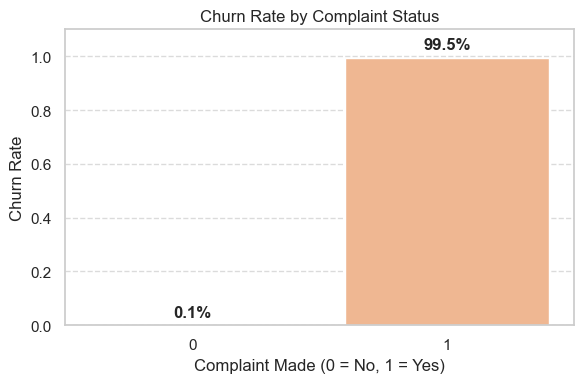

In [95]:

# Calculationfor churn rate for each complaint category
churn_rate = bank.groupby('Complain')['Exited'].mean().reset_index()
churn_rate['Percentage'] = churn_rate['Exited'] * 100

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=churn_rate, x='Complain', y='Exited', palette='pastel')

# Add percentage labels on bars
for index, row in churn_rate.iterrows():
    ax.text(x=index, y=row['Exited'] + 0.02, 
            s=f"{row['Percentage']:.1f}%", 
            ha='center', va='bottom', fontweight='bold')

plt.title('Churn Rate by Complaint Status')
plt.xlabel('Complaint Made (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


According to the analysis, the probability of churning among customers who lodged complaints is significantly higher than the probability among customers who never lodged complaints. Customers with complaints churn at nearly a 99.5% whereas the churn rate is relatively low as compared to customers without complaints, at approximately 0.1 percent. This implies that when a customer makes a complaint, they will most likely stop doing business with the business shortly. This conclusion reveals an interesting fact that complaints are a great indicator of dissatisfaction at an early stage. When the complaint is not handled systematically and in a timely manner, the customer will most likely churn. It emphasizes prompt follow-up and resolution of any complaint in order to retain such customers.

# Does satisfaction score influence churn rate?

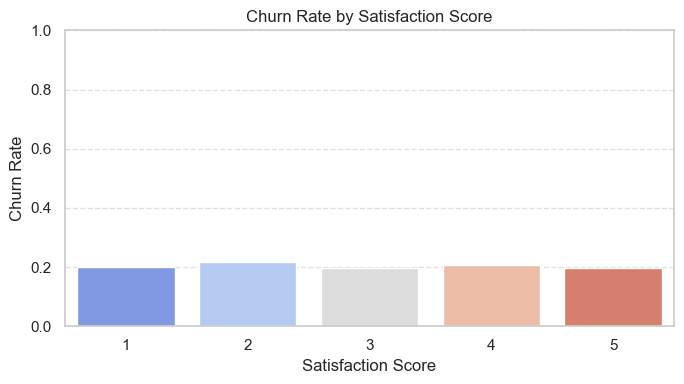

In [98]:
 # Calculating churn rate by satisfaction score
churn_by_score = bank.groupby('Satisfaction Score')['Exited'].mean().reset_index()

# Plot churn rate vs satisfaction score
plt.figure(figsize=(7, 4))
sns.barplot(data=churn_by_score, x='Satisfaction Score', y='Exited', palette='coolwarm')

plt.title('Churn Rate by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [100]:
print(churn_by_score)


   Satisfaction Score    Exited
0                   1  0.200311
1                   2  0.217974
2                   3  0.196376
3                   4  0.206175
4                   5  0.198104


The satisfaction score does not wield any significant role in the churn level. On a scale of 1 to 5, churn rate does not vary much and is mainly between the ranges of 19.64 and 21.80 percent. To give an example, it can be seen that the customer whose satisfaction rating is 1 has a churn rate of 20.03, whereas the customer with the highest satisfaction rating of 5 still has a churn rate of 19.81. Such a low value implies that customer satisfaction, in the context of this data, is not a good predictor of churn. This means that even satisfied customers can decide to leave, probably because of specific other reasons like offers, life changes, or because they lack a profound involvement. Thus, it might be valuable to consider behavioral predictors such as complaints, volume of products consumed, and account activity as potentially providing a better predictive measure of churn and ways to mitigate churn.

# Do customers with credit cards churn more or less than those without?

   HasCrCard  Churn_Rate
0          0    0.208149
1          1    0.201984


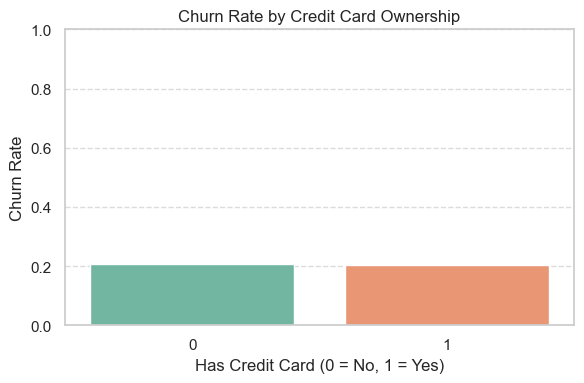

In [103]:
# Group by HasCrCard and calculate churn rate
creditcard_churn = bank.groupby('HasCrCard')['Exited'].mean().reset_index()
creditcard_churn.columns = ['HasCrCard', 'Churn_Rate']
print(creditcard_churn)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=creditcard_churn, x='HasCrCard', y='Churn_Rate', palette='Set2')
plt.title('Churn Rate by Credit Card Ownership')
plt.xlabel('Has Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

A comparison of the credit churn rates by credit card ownership demonstrates that there is a minor deviation between the two groups of customers. The churn rate of the customers **who do not have a credit card** (`HasCrCard = 0`) is 20.81 percent, whereas customers who are **carriers of a credit card** (`HasCrCard = 1`) have a slightly lower churn rate of 20.20 percent. The impact is quite low **0.6 percentage points**  however, it indicates that customer retention may be slightly higher if customers own a credit card. This might be because of the enhanced participation, utility, or the potential cost of a switch in the possession of a credit product that might offer a stronger bond between a customer and the bank. 

# What is the average balance of churned vs. retained customers?

   Exited       Balance
0       0  72742.750663
1       1  91109.476006


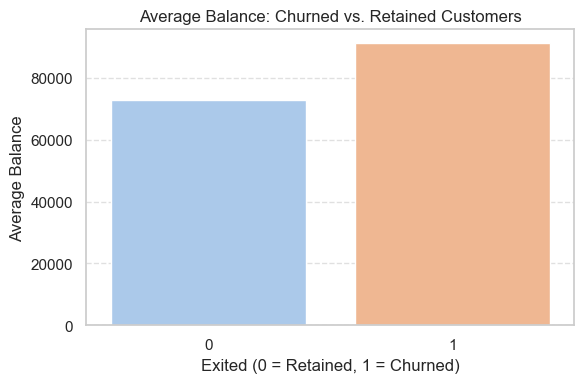

In [108]:
# Group by churn status and calculate average balance
avg_balance = bank.groupby('Exited')['Balance'].mean().reset_index()
print(avg_balance)
# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_balance, x='Exited', y='Balance', palette='pastel')

# Customize plot
plt.title('Average Balance: Churned vs. Retained Customers')
plt.xlabel('Exited (0 = Retained, 1 = Churned)')
plt.ylabel('Average Balance')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The average balance held by the churned customers is higher in comparison to retained customers (91,109.48 euros vs 72,742.75 euros). This indicates that the higher the amount of funds possessed by the customers, the more likely they are to defect due to increased choices in terms of banks, better expectations in terms of service delivery, or a higher willingness to switch as a result of attractive offers. As part of measures to minimize loss of revenue, the bank ought to focus on retention strategies for this lucrative segment.

# How does estimated salary compare between churned and loyal customers?

   Exited  Average Estimated Salary
0       0              99726.853141
1       1             101509.908783


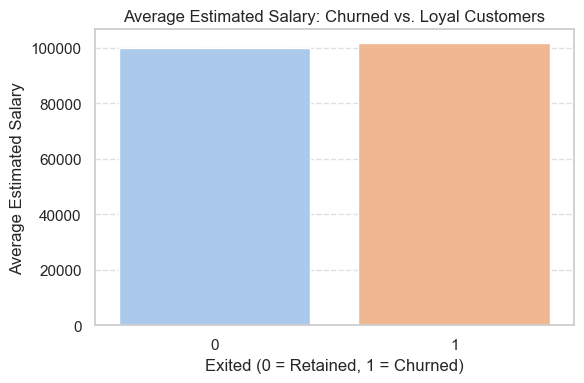

In [111]:
# Group by 'Exited' column and calculate mean estimated salary
salary_comparison = bank.groupby('Exited')['EstimatedSalary'].mean().reset_index()

# Rename columns for clarity
salary_comparison.columns = ['Exited', 'Average Estimated Salary']

# Display results
print(salary_comparison)

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(data=salary_comparison, x='Exited', y='Average Estimated Salary', palette='pastel')

# Customize plot
plt.title('Average Estimated Salary: Churned vs. Loyal Customers')
plt.xlabel('Exited (0 = Retained, 1 = Churned)')
plt.ylabel('Average Estimated Salary')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Is there a difference in churn across different tenure levels?

In [114]:
# Group data by 'Tenure' and 'Exited'
tenure_churn = bank.groupby(['Tenure', 'Exited']).size().reset_index(name='Count')

# Optional: Pivot for easier visualization
tenure_pivot = tenure_churn.pivot(index='Tenure', columns='Exited', values='Count').fillna(0)
tenure_pivot.columns = ['Retained', 'Churned']
tenure_pivot['Total'] = tenure_pivot['Retained'] + tenure_pivot['Churned']
tenure_pivot['Churn Rate (%)'] = (tenure_pivot['Churned'] / tenure_pivot['Total']) * 100

print(tenure_pivot)


        Retained  Churned  Total  Churn Rate (%)
Tenure                                          
0            318       95    413       23.002421
1            803      232   1035       22.415459
2            847      201   1048       19.179389
3            796      213   1009       21.110010
4            786      203    989       20.525784
5            803      209   1012       20.652174
6            771      196    967       20.268873
7            851      177   1028       17.217899
8            828      197   1025       19.219512
9            770      214    984       21.747967
10           389      101    490       20.612245


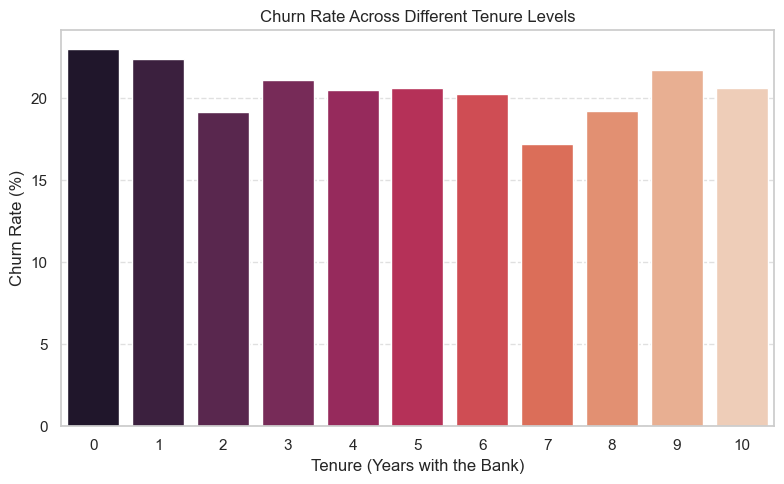

In [115]:
#  Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=tenure_pivot.index, y='Churn Rate (%)', data=tenure_pivot, palette='rocket')

# Customize
plt.title('Churn Rate Across Different Tenure Levels')
plt.xlabel('Tenure (Years with the Bank)')
plt.ylabel('Churn Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The analysis indicates a visible difference in churn rates among the different levels of tenures. The churn rates are highest among customers with shorter tenures, especially with 0 and 1 years tenure in the bank, with the rate exceeding 23.0 percent and 22.4 percent, respectively. This means new clients have more chances of abandoning, probably because of displeasure or disconnection. Comparatively, the customer with seven years of longevity suffers the least, with a churn level of only 17.2 percent, meaning they might have some stability or loyalty windows. After this, the churn rates increase marginally again, especially at 9 and 10 years, suggesting that customer satisfaction may have fallen or is a part of the natural customer disengagement cycle.

# Multivariate

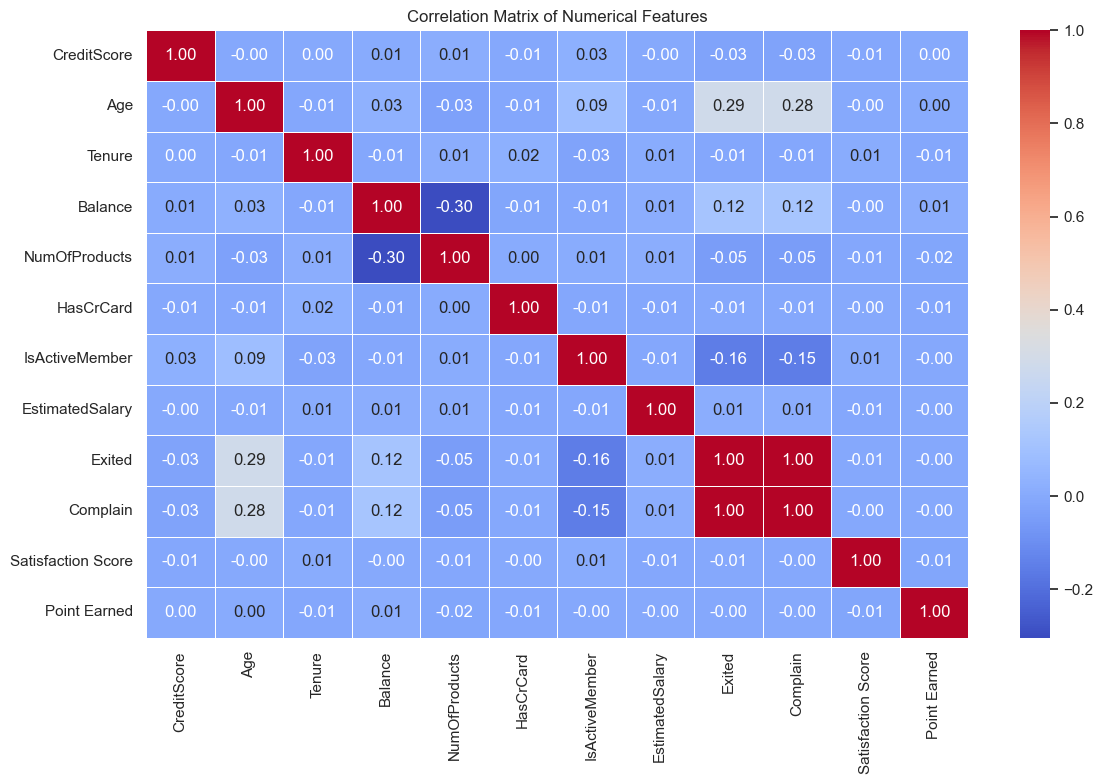

In [119]:
# Select only numeric columns
numeric_cols = bank.select_dtypes(include='number')

# Drop ID-like columns that don't add analytical value
numeric_cols = numeric_cols.drop(columns=['RowNumber', 'CustomerId'])

# Compute correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


In the correlation matrix, it is possible to identify some relations that exist between customer attributes and the probability of customer attrition. Interestingly, churn positively correlates with age and presence of customer complaints with moderate strength, which means that the older customers are more likely to leave, and those who raise complaints have higher probabilities to churn. Conversely, active membership and having several products are inversely related to churn, which implies that these customers are less likely to leave. Balance is weakly and positively correlated with churn, although the influence of most other numerical terms is small. The results might be used to inform specific retention activities that draw attention to older, dissatisfied, or less-engaged customers.

In [121]:
# Show only correlation with 'Exited'
corr_target = numeric_cols.corr()['Exited'].sort_values(ascending=False)
print(corr_target)


Exited                1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
Tenure               -0.013656
CreditScore          -0.026771
NumOfProducts        -0.047611
IsActiveMember       -0.156356
Name: Exited, dtype: float64


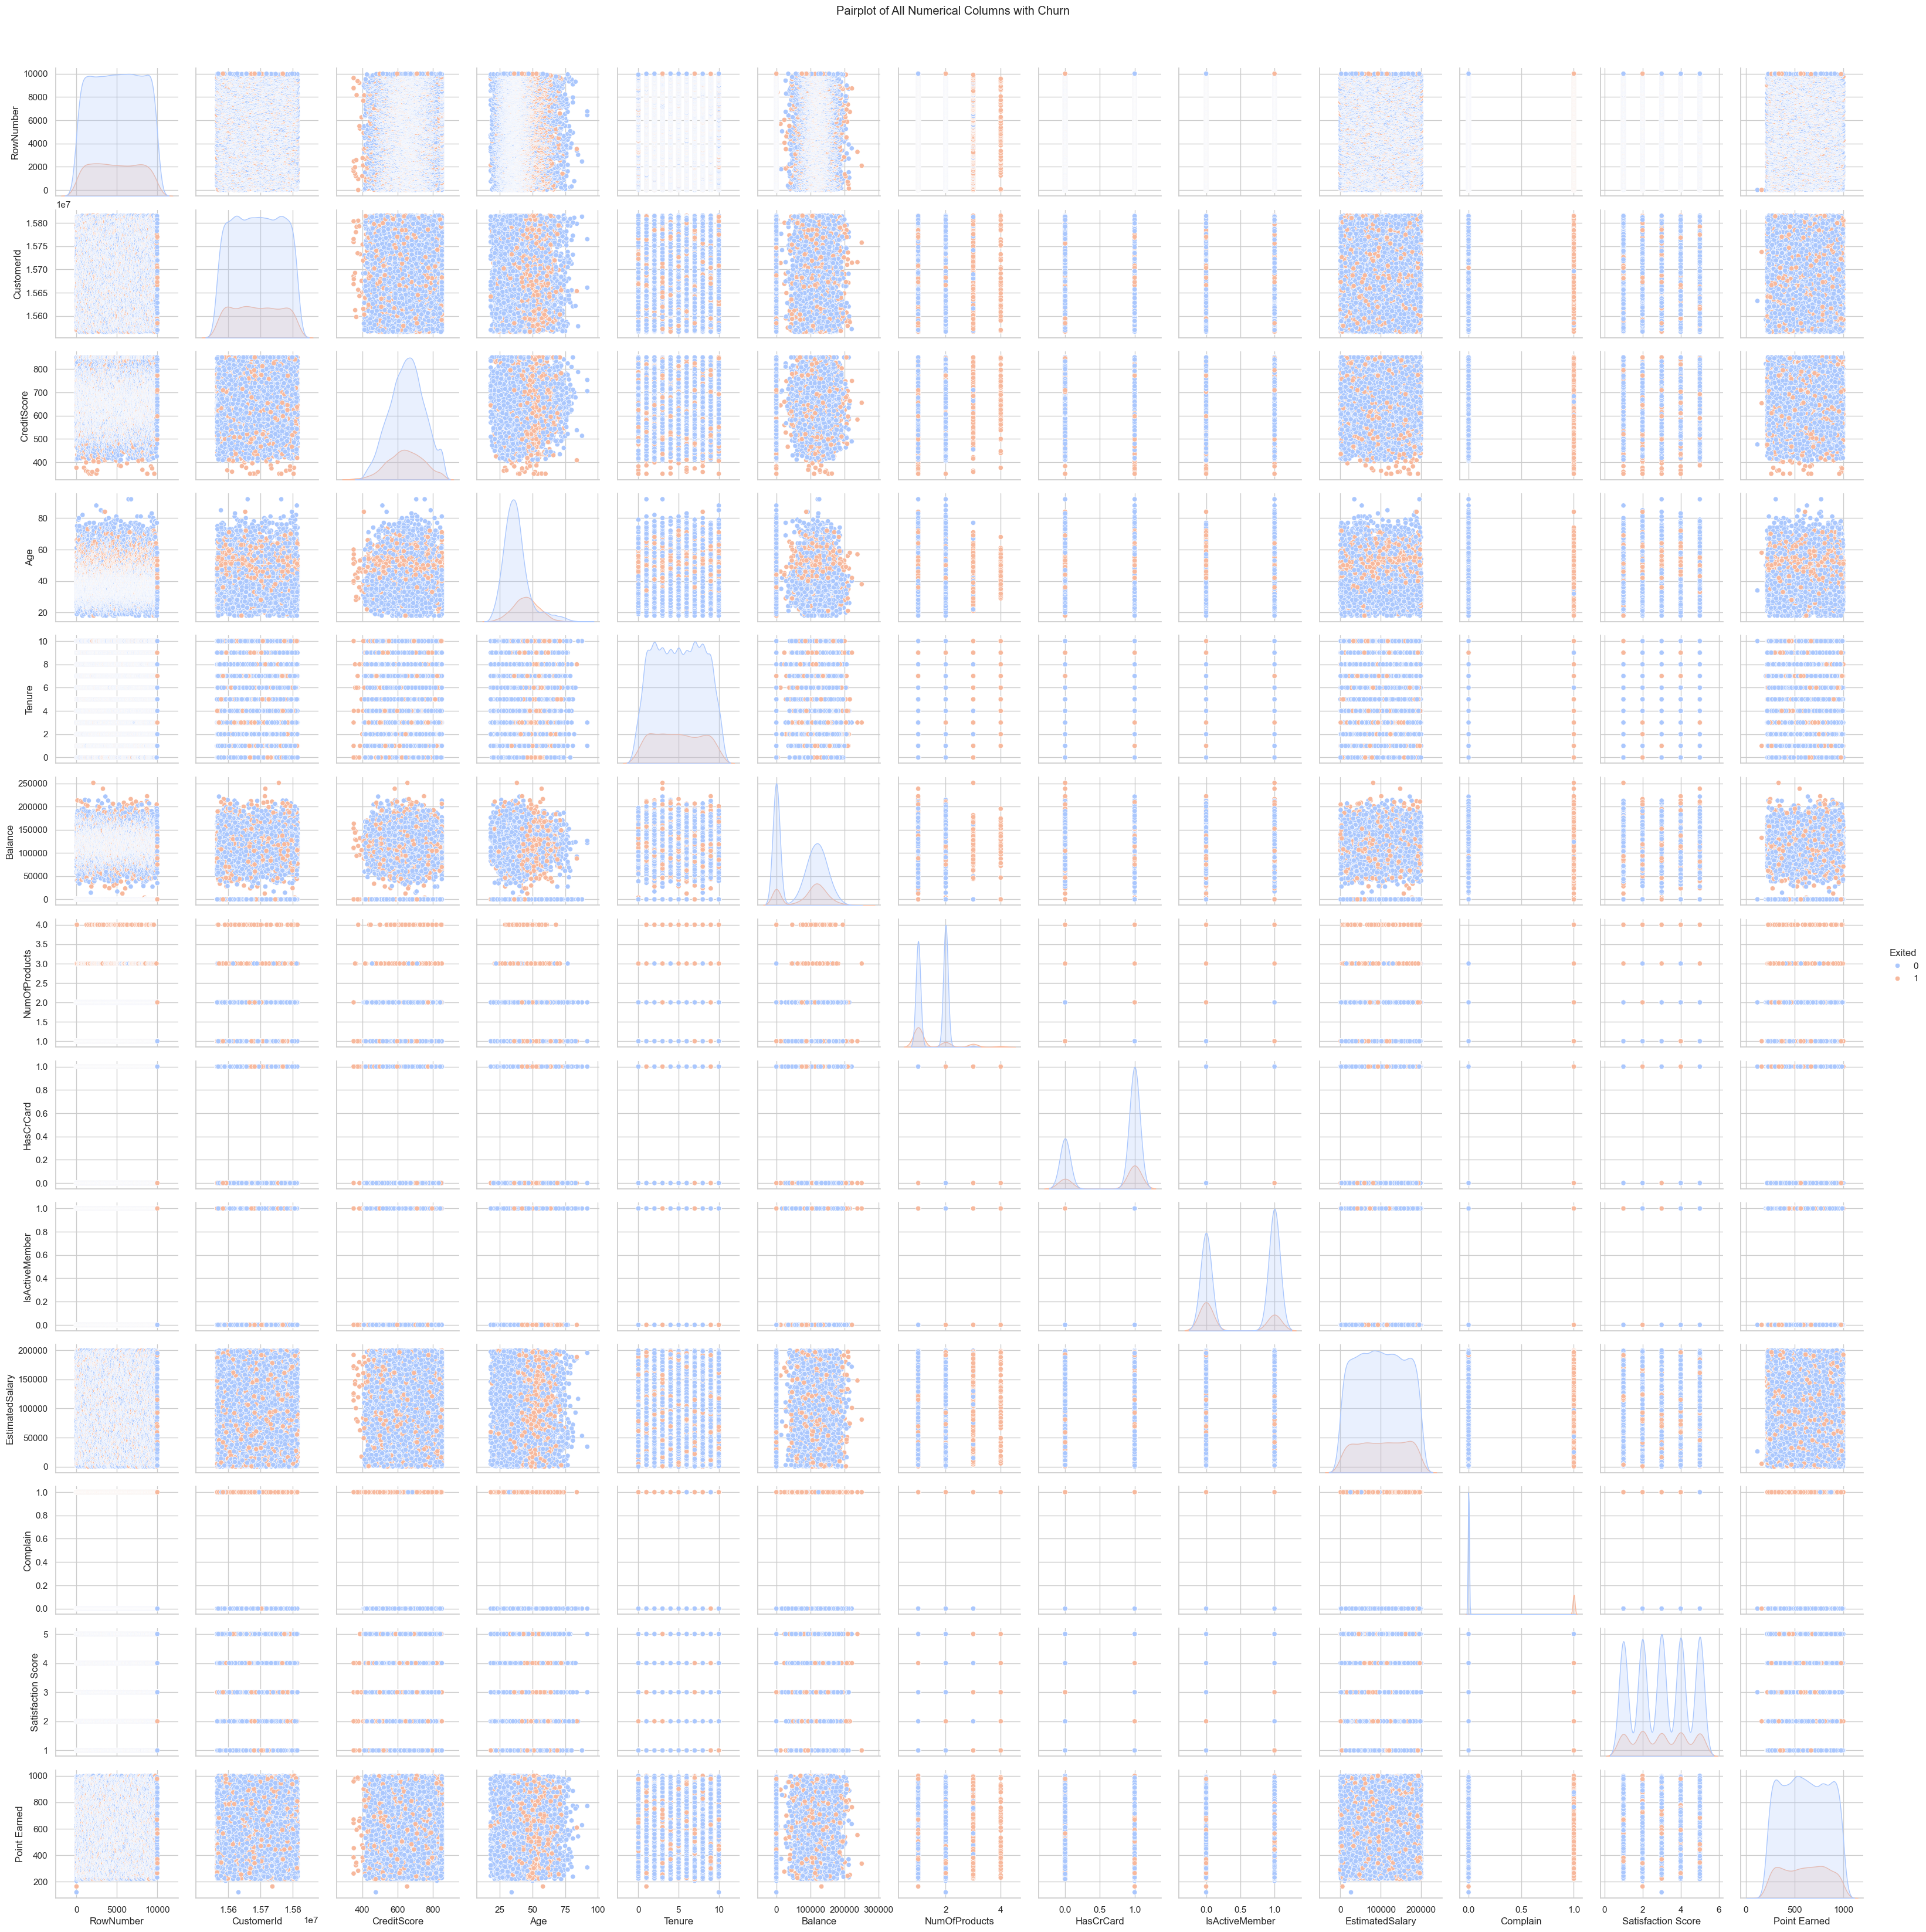

In [122]:

#  numeric columns
numeric_cols = bank.select_dtypes(include='number')

# Create pairplot
sns.pairplot(numeric_cols, hue='Exited', diag_kind='kde', palette='coolwarm')
plt.suptitle("Pairplot of All Numerical Columns with Churn", y=1.02)
plt.show()


The pairplot of numerical features indicates that churned customers were older and had bigger account balances, indicating that these variables can be good predictors. Conversely, features such as EstimatedSalary and Tenure do not exist in patterns relative to the churn.

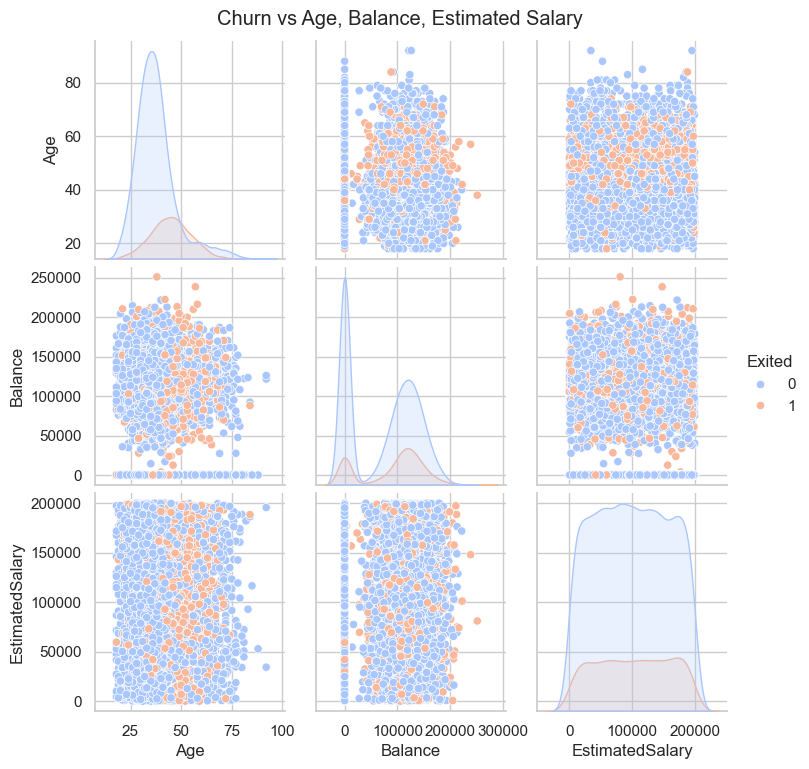

In [125]:
# relevant columns
features = ['Age', 'Balance', 'EstimatedSalary', 'Exited']

# Pairplot to see relationships colored by churn
sns.pairplot(bank[features], hue='Exited', diag_kind='kde', palette='coolwarm')
plt.suptitle("Churn vs Age, Balance, Estimated Salary", y=1.02)
plt.show()


The pairplot of the features indicates that churned customers were older and had bigger account balances, indicating that these variables can be good predictors. Conversely, EstimatedSalary Salary doesn’t show a clear pattern — churners and non-churners are spread across all salary levels.


# Alternative Hypothesis (H 1):
The likelihood of churn among senior citizens is much higher compared to that of young customers.

# Data preprocessing 

In [130]:
bank.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# Drop ID columns
X = bank.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = bank['Exited']

# Identify column types
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                    'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
                    'Satisfaction Score', 'Point Earned', 'Complain']  

categorical_features = ['Geography', 'Gender', 'Card Type']

# Preprocessing: scale numerics + one-hot encode categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_balanced).value_counts().to_dict())
print("Test set:", y_test.value_counts().to_dict())




Before SMOTE: {0: 6370, 1: 1630}
After SMOTE: {0: 6370, 1: 6370}
Test set: {0: 1592, 1: 408}


In [201]:
# Save cleaned dataset for deployment
bank_clean = bank.drop(['RowNumber', 'CustomerId', 'Surname', 
                        'Complain', 'Satisfaction Score', 
                        'Point Earned'], axis=1)

bank_clean.to_csv("bank_churn_clean.csv", index=False)
print("Clean file saved as bank_churn_clean.csv")


Clean file saved as bank_churn_clean.csv


# Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression

# Define logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on your training data
log_reg.fit(X_train, y_train)

# Now you can access coefficients
feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
coefs = log_reg.coef_[0]

importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefs,
    "Abs_Coefficient": np.abs(coefs)
}).sort_values("Abs_Coefficient", ascending=False)

print(importance.head(15))



               Feature  Coefficient  Abs_Coefficient
10            Complain     5.154954         5.154954
1                  Age     0.832499         0.832499
6       IsActiveMember    -0.627692         0.627692
9         Point Earned    -0.394427         0.394427
11   Geography_Germany    -0.323450         0.323450
16    Card Type_SILVER     0.214971         0.214971
8   Satisfaction Score    -0.209228         0.209228
14      Card Type_GOLD    -0.105316         0.105316
15  Card Type_PLATINUM    -0.102588         0.102588
4        NumOfProducts    -0.096246         0.096246
13         Gender_Male     0.094518         0.094518
0          CreditScore     0.065044         0.065044
2               Tenure    -0.064789         0.064789
5            HasCrCard    -0.040951         0.040951
7      EstimatedSalary     0.030986         0.030986


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# Balance with SMOTE 
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Training Logistic Regression 
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_bal, y_train_bal)

#  Prediction
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:,1]

#  Evaluation
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1592
           1       0.38      0.71      0.50       408

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.71      0.73      2000

Accuracy: 0.707
F1 Score: 0.49569707401032703
ROC AUC: 0.776963863434821


# Random Forest Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Training Random Forest 
rf = RandomForestClassifier(
    n_estimators=300,        
    max_depth=None,         
    random_state=42,
    n_jobs=-1                
)
rf.fit(X_train_bal, y_train_bal)

# Prediction
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

# Evaluation
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      1592
           1       0.67      0.58      0.62       408

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy: 0.857
F1 Score: 0.6226912928759895
ROC AUC: 0.8628574859592079


# XGBoost Classifier

In [154]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Training XGBoost
xgb = XGBClassifier(
    n_estimators=300,       
    learning_rate=0.05,     
    max_depth=6,            
    subsample=0.8,          
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb.fit(X_train_bal, y_train_bal)

# Prediction
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

# Evaluation
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1592
           1       0.71      0.56      0.62       408

    accuracy                           0.86      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.85      0.86      0.86      2000

Accuracy: 0.8625
F1 Score: 0.6227709190672154
ROC AUC: 0.8726937382993399


# Support Vector Machine (SVM) Classifier

In [156]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Training SVM 
svm = SVC(
    kernel='rbf',        
    C=1.0,              
    probability=True,    
    random_state=42
)
svm.fit(X_train_bal, y_train_bal)

# Prediction
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:,1]

#  Evaluate 
print("SVM Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_proba_svm))


SVM Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86      1592
           1       0.49      0.72      0.58       408

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000

Accuracy: 0.787
F1 Score: 0.5798816568047336
ROC AUC: 0.8460654990639472


# K-Nearest Neighbors (KNN) Classifier

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Training KNN 
knn = KNeighborsClassifier(
    n_neighbors=5,   
    metric='minkowski', 
    p=2             
)
knn.fit(X_train_bal, y_train_bal)

# Predict 
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:,1]

# --- Evaluate ---
print("KNN Report:\n", classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_proba_knn))


KNN Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1592
           1       0.40      0.68      0.50       408

    accuracy                           0.73      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.80      0.72      0.75      2000

Accuracy: 0.725
F1 Score: 0.5027124773960217
ROC AUC: 0.7654325549315204


# Naive Bayes Classifier

In [160]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Training Naive Bayes 
nb = GaussianNB()
nb.fit(X_train_bal, y_train_bal)

# Prediction
y_pred_nb = nb.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)[:,1]

# Evaluation
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_nb))


Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.89      0.71      0.79      1592
           1       0.37      0.67      0.48       408

    accuracy                           0.70      2000
   macro avg       0.63      0.69      0.64      2000
weighted avg       0.79      0.70      0.73      2000

Accuracy: 0.704
F1 Score: 0.4816112084063047
ROC AUC: 0.7721850674943344


# Extra Trees Classifier

In [173]:
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
# Train model 
et = ExtraTreesClassifier(n_estimators=200, random_state=42)
et.fit(X_train, y_train)

# Predictions
y_pred_et = et.predict(X_test)
y_proba_et = et.predict_proba(X_test)[:, 1]

# Metrics
print("Extra Trees Results:")
print(classification_report(y_test, y_pred_et))
print(f"Accuracy: {accuracy_score(y_test, y_pred_et):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_et):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_et):.4f}")


Extra Trees Results:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1592
           1       0.77      0.43      0.55       408

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy: 0.8575
F1 Score: 0.5512
ROC AUC: 0.8535


# Gradient Boosting Classifier

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
# Train model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

# Metrics
print("Gradient Boosting Results:")
print(classification_report(y_test, y_pred_gb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_gb):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_gb):.4f}")

Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1592
           1       0.79      0.51      0.62       408

    accuracy                           0.87      2000
   macro avg       0.84      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy: 0.8715
F1 Score: 0.6170
ROC AUC: 0.8804


# Hyperparameter Tuning

In [186]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42
)

param_dist = {
    'n_estimators': [200, 400, 600],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring="roc_auc",
    n_iter=30,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)  
best_model = search.best_estimator_
print("Best params:", search.best_params_)

# Evaluate
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'subsample': 0.9, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}
Accuracy: 0.8695
F1 Score: 0.5965996908809892
ROC AUC: 0.8786179672874175


In [188]:
from sklearn.metrics import precision_recall_curve, f1_score

y_proba = best_model.predict_proba(X_test)[:,1]
prec, rec, thr = precision_recall_curve(y_test, y_proba)

# Find threshold with best F1
f1s = 2 * (prec*rec) / (prec+rec+1e-12)
best_thr = thr[f1s.argmax()-1]
print("Best threshold:", best_thr)

y_pred = (y_proba >= best_thr).astype(int)
print("F1:", f1_score(y_test, y_pred))


Best threshold: 0.364258
F1: 0.6511024643320363


In [190]:
# ==== Imports ====
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    f1_score, roc_auc_score, precision_recall_curve, auc
)
from xgboost import XGBClassifier

# ==== Best tuned XGBoost (from your RandomizedSearchCV) ====
xgb_model = XGBClassifier(
    subsample=0.8,
    n_estimators=600,
    min_child_weight=3,
    max_depth=6,
    learning_rate=0.05,
    gamma=0.2,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    use_label_encoder=False
)
# ==== Train model (X_train_bal, y_train_bal come from SMOTE) ====
xgb_model.fit(X_train_bal, y_train_bal)

# ==== Predict probabilities ====
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# ==== Default threshold (0.5) ====
y_pred_default = (y_proba >= 0.5).astype(int)
print("=== Default threshold (0.5) ===")
print(classification_report(y_test, y_pred_default, digits=3))
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("F1:", f1_score(y_test, y_pred_default))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


=== Default threshold (0.5) ===
              precision    recall  f1-score   support

           0      0.888     0.935     0.911      1592
           1      0.680     0.542     0.603       408

    accuracy                          0.855      2000
   macro avg      0.784     0.738     0.757      2000
weighted avg      0.846     0.855     0.848      2000

Accuracy: 0.8545
F1: 0.6030013642564802
ROC AUC: 0.8600524066410483


In [192]:
# ==== Threshold tuning (maximize F1) ====
prec, rec, thr = precision_recall_curve(y_test, y_proba)
f1s = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1s)
best_thr = thr[best_idx-1] if best_idx > 0 else 0.5

print("\n=== Tuned threshold ===")
print("Best threshold:", round(best_thr, 3))
print("Best F1:", round(f1s[best_idx], 3))
print("Precision:", round(prec[best_idx], 3))
print("Recall:", round(rec[best_idx], 3))
# Predictions with best threshold
y_pred_best = (y_proba >= best_thr).astype(int)
print(classification_report(y_test, y_pred_best, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


=== Tuned threshold ===
Best threshold: 0.342
Best F1: 0.628
Precision: 0.588
Recall: 0.674
              precision    recall  f1-score   support

           0      0.913     0.878     0.895      1592
           1      0.586     0.674     0.627       408

    accuracy                          0.837      2000
   macro avg      0.750     0.776     0.761      2000
weighted avg      0.846     0.837     0.841      2000

Confusion Matrix:
 [[1398  194]
 [ 133  275]]


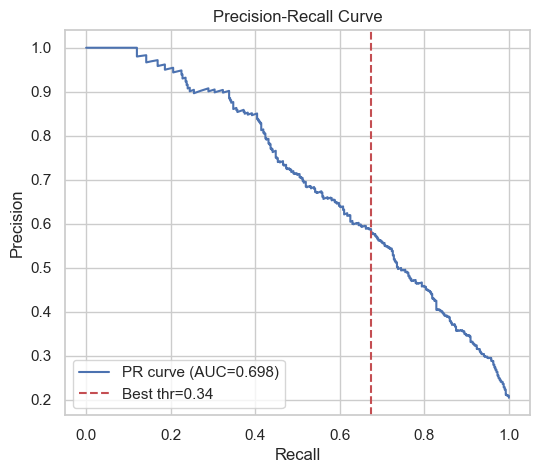

In [194]:
# ==== Precision-Recall curve ====
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f"PR curve (AUC={auc(rec, prec):.3f})")
plt.axvline(x=rec[best_idx], color='r', linestyle='--', label=f"Best thr={best_thr:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

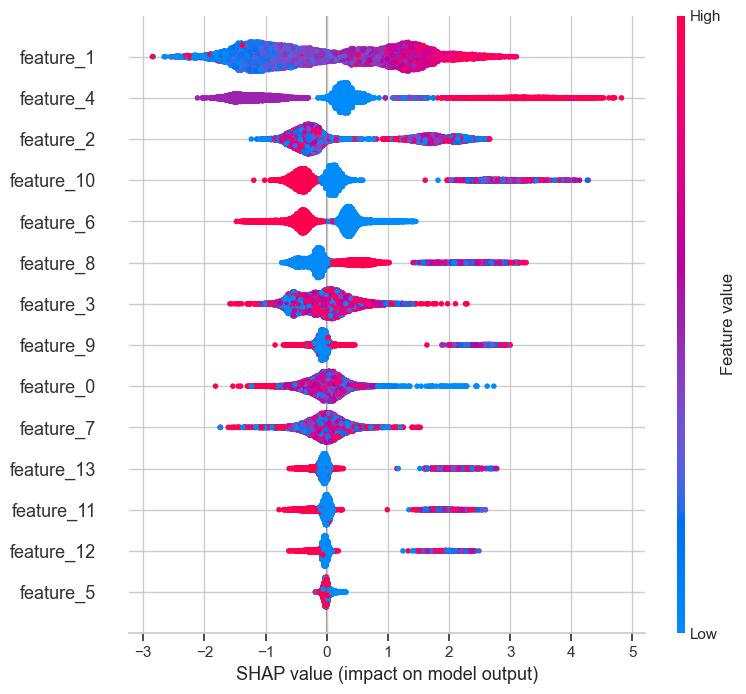

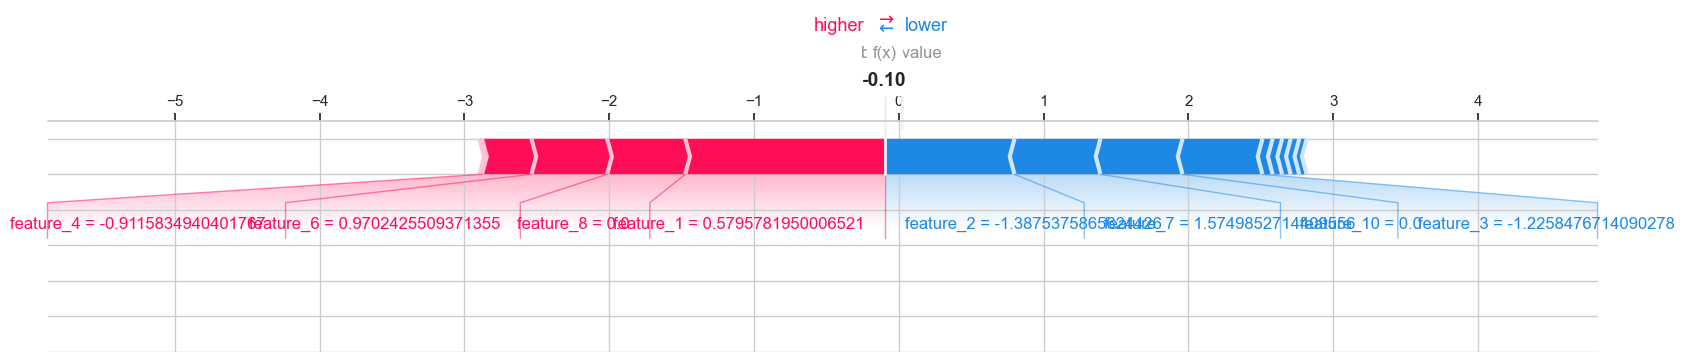

In [195]:
import pandas as pd
import shap

# Make sure feature_names matches your final processed dataset
try:
    feature_names = X_train_bal.columns.tolist()
except AttributeError:
    feature_names = [f"feature_{i}" for i in range(X_train_bal.shape[1])]

# Convert X_test safely into DataFrame
if isinstance(X_test, np.ndarray):
    X_test_df = pd.DataFrame(X_test, columns=feature_names)
else:
    X_test_df = X_test.copy()

# SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train_bal)

# Global importance
shap.summary_plot(shap_values, X_train_bal, feature_names=feature_names, show=True)

# Local explanation (one churner)
churn_idx = np.where((y_test==1) & (y_pred_best==1))[0][0]
shap.force_plot(
    explainer.expected_value,
    shap_values[churn_idx, :],
    X_test_df.iloc[churn_idx, :],
    matplotlib=True
)


In [203]:
import joblib


# Save the trained best model
joblib.dump(best_model, "best_xgb_model.pkl")

#  Also save the preprocessor so you can transform new data correctly
joblib.dump(preprocessor, "preprocessor.pkl")

print(" Best model and preprocessor saved successfully!")


 Best model and preprocessor saved successfully!
